# <center>ASSIGNMENT 3<center>

<p>Team Name:FOXHOUND
<p>Student Names:Devin Ford, Anna Valdez, Derrick Poon
<p>Student W#s: 

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

Load "titanic.csv" into the data frame object "data"</br>
[train.csv](https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/titanic/train.csv)

In [2]:
data = pd.read_csv("Titanic_Data_All.csv")

## Data Processing

Create a data frame object "pasUpto19".
> Columns of pasUpto19 = {AGE_12, AGE_TEEN, PCLASS}.<br>
> AGE_12 : Passengers with age in \[1, 12]<br>
> AGE_TEEN : Passengers with age in \[13, 19]<br>

In [6]:
pasUpto19 = pd.DataFrame(zip(data[data['Age'].between(1,19)].Age, data[data['Age'].between(1,19)].Age, data[data['Age'].between(1,19)].Pclass), columns=['AGE_12', 'AGE_TEEN', 'PCLASS'])
pasUpto19.AGE_12.iloc[pasUpto19[pasUpto19['AGE_12'].between(13,19)].index] = None
pasUpto19.AGE_TEEN.iloc[pasUpto19[pasUpto19['AGE_TEEN'].between(1,12)].index] = None

display(pasUpto19)


c:\Users\Oujideary\anaconda3\envs\CMPS340\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,AGE_12,AGE_TEEN,PCLASS
0,2.0,NaN,1
1,NaN,18.0,1
2,NaN,19.0,1
3,NaN,17.0,1
4,11.0,NaN,1
...,...,...,...
207,NaN,16.0,3
208,NaN,14.0,3
209,NaN,18.0,3
210,NaN,15.0,3


Display 5 rows below and above the middle row of "pasUpto19":

In [8]:
display(pasUpto19.iloc[((len(pasUpto19)-1)//2)-6 : ((len(pasUpto19)-1)//2)+5])

,AGE_12,AGE_TEEN,PCLASS
99,NaN,18.5,3
100,NaN,19.0,3
101,NaN,18.0,3
102,NaN,18.0,3
103,NaN,17.0,3
104,NaN,17.0,3
105,NaN,16.0,3
106,NaN,18.0,3
107,NaN,18.0,3
108,NaN,19.0,3


Group pasUpto19 by AGE_TEEN:

In [10]:
display(pasUpto19.groupby('AGE_TEEN').size())

AGE_TEEN
13.0     5
14.0     8
14.5     2
15.0     6
16.0    19
17.0    20
18.0    39
18.5     3
19.0    29
dtype: int64

Get the mean of PCLASS for each group of AGE_TEEN and display the mean by age groups:

In [11]:
display(pasUpto19.groupby('AGE_TEEN')['PCLASS'].mean())

AGE_TEEN
13.0    2.400000
14.0    2.500000
14.5    3.000000
15.0    2.500000
16.0    2.578947
17.0    2.450000
18.0    2.461538
18.5    2.666667
19.0    2.379310
Name: PCLASS, dtype: float64

Sort "pasUpto19" by the age of teenages and store into a DF object "pasUpto19_sortTeen":

In [12]:
pasUpto19_sortTeen = pasUpto19.sort_values('AGE_TEEN')
display(pasUpto19_sortTeen)

,AGE_12,AGE_TEEN,PCLASS
72,NaN,13.0,3
52,NaN,13.0,2
88,NaN,13.0,3
91,NaN,13.0,3
19,NaN,13.0,1
...,...,...,...
197,2.0,NaN,3
201,7.0,NaN,3
202,9.0,NaN,3
204,11.5,NaN,3


## Summarize Data

Create "pasUpto19_stat" an object from the statistics of pasUpto19. Use the method describe(). Print the statistics.

In [13]:
pasUpto19_stat = pasUpto19.describe()
display(pasUpto19_stat)

,AGE_12,AGE_TEEN,PCLASS
count,81.000000,131.000000,212.000000
mean,5.487654,17.164122,2.542453
std,3.427805,1.677272,0.697381
min,1.000000,13.000000,1.000000
25%,2.000000,16.000000,2.000000
50%,5.000000,18.000000,3.000000
75%,9.000000,18.000000,3.000000
max,12.000000,19.000000,3.000000


Store each statistics of pasUpto19_stat into a multi-dimensional list "pasUpto19_stat_lst" individually. Print the list.

In [15]:
pasUpto19_stat_lst = []
pasUpto19_stat_lst.append(pasUpto19_stat.AGE_12.to_list())
pasUpto19_stat_lst.append(pasUpto19_stat.AGE_TEEN.to_list())
pasUpto19_stat_lst.append(pasUpto19_stat.PCLASS.to_list())
display(pasUpto19_stat_lst)

[[81.0, 5.487654320987654, 3.42780479009706, 1.0, 2.0, 5.0, 9.0, 12.0],
 [131.0, 17.16412213740458, 1.6772719930929079, 13.0, 16.0, 18.0, 18.0, 19.0],
 [212.0, 2.542452830188679, 0.6973814412082642, 1.0, 2.0, 3.0, 3.0, 3.0]]

Print rows where AGE_12 >= mean of AGE_12 or AGE_TEEN >= mean AGE_TEEN.

In [17]:
display(pasUpto19.iloc[pasUpto19[pasUpto19.AGE_12 >= pasUpto19_stat['AGE_12']['mean']].index], pasUpto19.iloc[pasUpto19[pasUpto19.AGE_TEEN >= pasUpto19_stat['AGE_TEEN']['mean']].index])

,AGE_12,AGE_TEEN,PCLASS
4,11.0,NaN,1
22,6.0,NaN,1
30,12.0,NaN,2
34,8.0,NaN,2
35,8.0,NaN,2
40,8.0,NaN,2
44,6.0,NaN,2
45,7.0,NaN,2
62,8.0,NaN,2
68,12.0,NaN,2


,AGE_12,AGE_TEEN,PCLASS
1,NaN,18.0,1
2,NaN,19.0,1
8,NaN,19.0,1
9,NaN,19.0,1
14,NaN,19.0,1
...,...,...,...
195,NaN,19.0,3
196,NaN,19.0,3
203,NaN,18.0,3
206,NaN,18.0,3


## Use of method "eval(Age ...)"

<b>Sample Code Snippet:</b><br>
<p>
df = pd.DataFrame({'A': range(1, 6), 'B': range(10, 0, -2)})

df.eval('C = A + B')
</p>

In [18]:
#I don't really know what this is asking me to do in context of the project so I just did the code snippet
df = pd.DataFrame({'A':range(1,6), 'B':range(10,0,-2)})
df.eval('C = A + B')

,A,B,C
0,1,10,11
1,2,8,10
2,3,6,9
3,4,4,8
4,5,2,7


Get passengers whose age is in \[3,7) or in \[12, 15] and store into "pas3to6_12to15":

In [19]:
#pas3to6_12to15 = pd.DataFrame(zip(data[data['Age'].between(3,15)].Age, data[data['Age'].between(3,15)].Pclass), columns=['Age', 'Pclass'])
#pas3to6_12to15.drop(pas3to6_12to15[pas3to6_12to15['Age'].between(7,11)].index)

pas3to6_12to15 = data[data['Age'].between(3,6) | data['Age'].between(12,15)]

display(pas3to6_12to15)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
94,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
193,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
249,1,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C
340,2,1,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
341,2,1,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0000,F4,S
350,2,1,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S
430,2,1,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
479,2,1,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


## Plots

Create a figure "Plots for Pclass and Age"<br>
Plot histograms for "PCLASS", "AGE_12", and "AGE_TEEN" side by side:

Text(0, 0.5, 'Number of passengers')

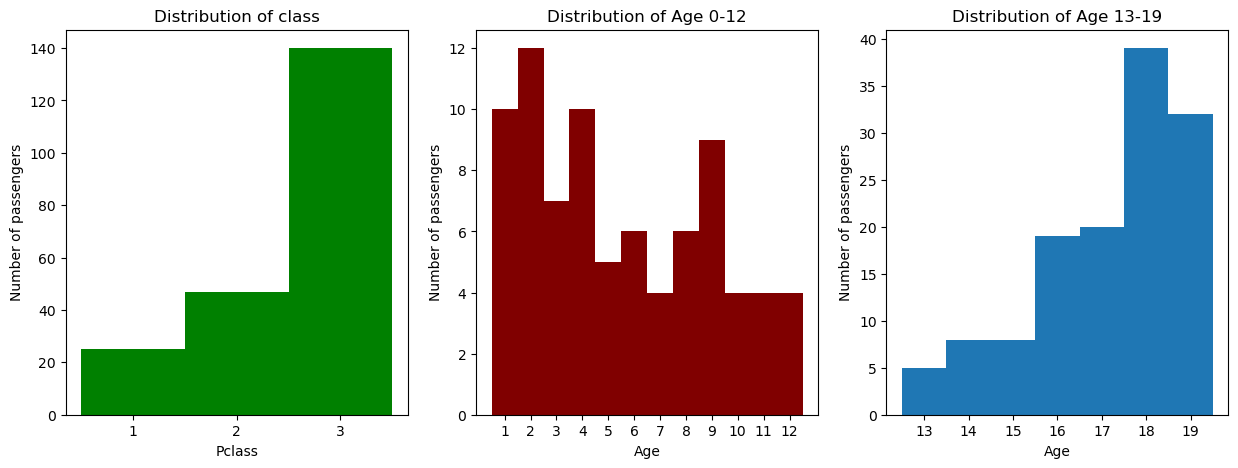

In [36]:
#plot for pclass
fig = plt.figure(figsize=(15,5), dpi=100)
alpha_bar_chart = 0.75

ax1 = plt.subplot2grid((1,3), (0,0))
plt.hist(pasUpto19.Pclass, bins=[0.5,1.5,1.5,2.5,2.5,3.5], color='green' )
ax1.set_xticks([1,2,3])
plt.title('Distribution of class')
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')

#plot for Age_12
ax2 = plt.subplot2grid((1,3), (0,1))
plt.hist(pasUpto19.Age_12, bins=[0.5,1.5,1.5,2.5,2.5,3.5,3.5,4.5,4.5,5.5,6.5,6.5,7.5,7.5,8.5,8.5,9.5,9.5,10.5,10.5,11.5,11.5,12.5], color='Maroon' )
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Distribution of Age 0-12')
plt.xlabel('Age')
plt.ylabel('Number of passengers')

#plot for Age_Teen
ax3 = plt.subplot2grid((1,3),(0,2))
plt.hist(pasUpto19.Age_Teen, bins=[12.5,13.5,13.5,14.5,14.5,15.5,15.5,16.5,16.5,17.5,17.5,18.5,18.5,19.5])
ax3.set_xticks([13,14,15,16,17,18,19])
plt.title('Distribution of Age 13-19')
plt.xlabel('Age')
plt.ylabel('Number of passengers')

Add a scatter plot for "PCLASS" vs. "AGE_12" into the first cell and "PCLASS" vs. "AGE_TEEN" into the last cell on the same figure at the second row:

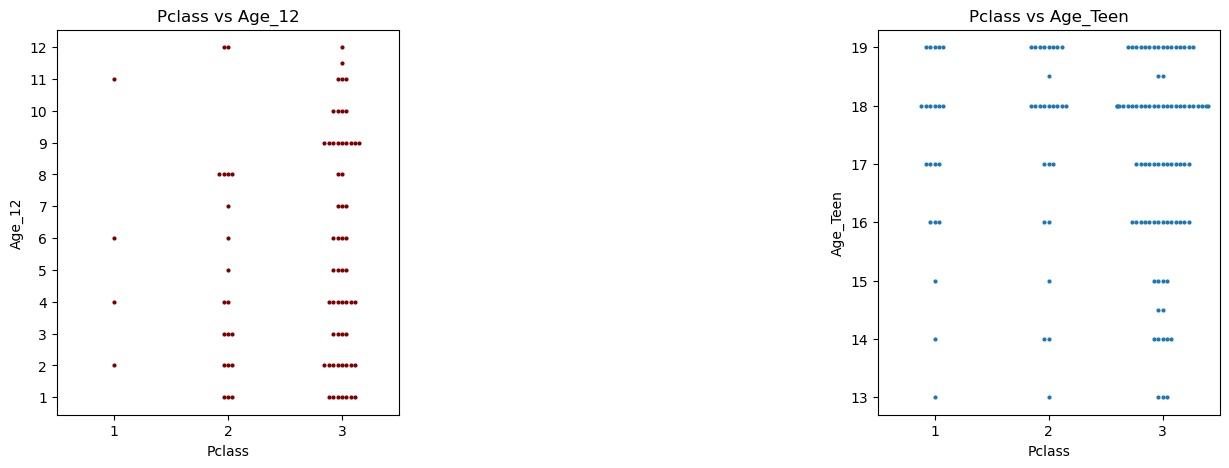

In [50]:
#swarmplot for pclass vs age 12
fig2 = plt.figure(figsize = (15,5), dpi=100)
ax4 = plt.subplot2grid((1, 3), (0,0))
sns.swarmplot(data = pasUpto19, x="PCLASS", y="AGE_12", color='maroon', size=3).set(title ='PCLASS vs AGE_12')
ax4.set_yticks(range(1,13))

#swarmplot for pclass vs age teen
ax5 = plt.subplot2grid((1,3), (0, 2))
sns.swarmplot(data = pasUpto19, x = 'PCLASS', y = 'AGE_TEEN', size=3).set(title = "PCLASS vs AGE_TEEN")
ax5.set_yticks(range(13,20))

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

Kyle Tran, Stack Overflow, saturncloud.io, pandas documention, matplotlib documentation, Hal (Otacon) Emmerich, and it was revealed to me in a dream.